In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
booking = pd.read_csv('https://raw.githubusercontent.com/aaqibqadeer/Hotel-booking-demand/master/hotel_bookings.csv')

In [ ]:
#inspect the data
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
booking.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 01-07-15
1  Resort Hotel            0  ...           Check-Out                 01-07-15
2  Resort Hotel            0  ...           Check-Out                 02-07-15
3  Resort Hotel            0  ...           Check-Out                 02-07-15
4  Resort Hotel            0  ...           Check-Out                 03-07-15

[5 rows x 32 columns]

In [ ]:
booking.shape

(119390, 32)

In [ ]:
booking.describe()

is_canceled  ...  total_of_special_requests
count  119390.000000  ...              119390.000000
mean        0.370416  ...                   0.571363
std         0.482918  ...                   0.792798
min         0.000000  ...                   0.000000
25%         0.000000  ...                   0.000000
50%         0.000000  ...                   0.000000
75%         1.000000  ...                   1.000000
max         1.000000  ...                   5.000000

[8 rows x 20 columns]

In [ ]:
# check missing values
booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Exploratory Analysis

In [ ]:
# check the number of cancelation
booking['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


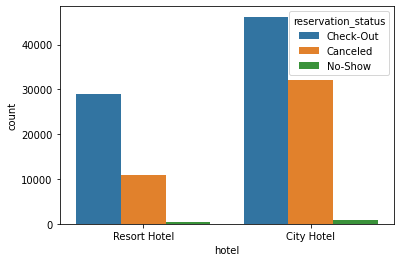

In [ ]:
#see the reservation status in both hotels
sns.countplot(booking.hotel, hue=booking.reservation_status)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


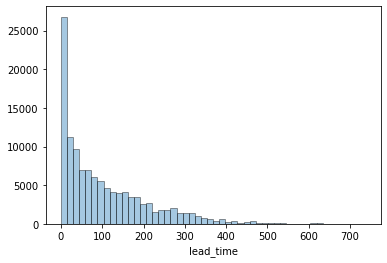

In [ ]:
#lead time distribution
sns.distplot(booking.lead_time, kde=False,hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


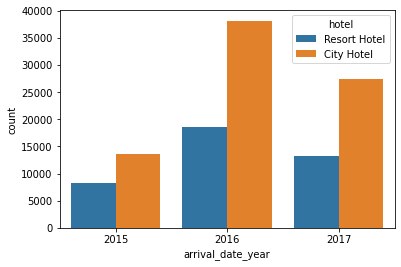

In [ ]:
#distribution of booking for each year
sns.countplot(booking.arrival_date_year, hue = booking.hotel)

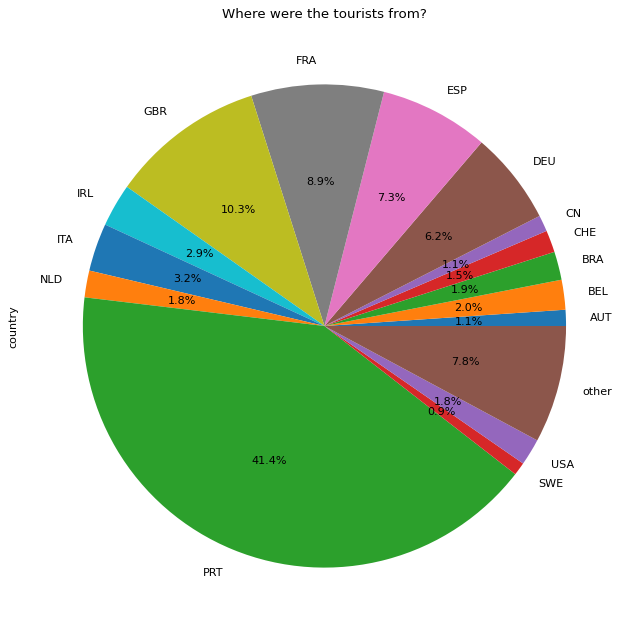

In [ ]:
#Where were the tourists from
c=booking['country'].value_counts().nlargest(50)

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

countries = c.groupby(np.where(c>=1000,c.index,'other')).sum().plot(kind='pie', figsize=(20,10), autopct='%.1f%%', title='Where were the tourists from?')


In [ ]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month = pd.DataFrame(booking['arrival_date_month'].value_counts().reindex(order))

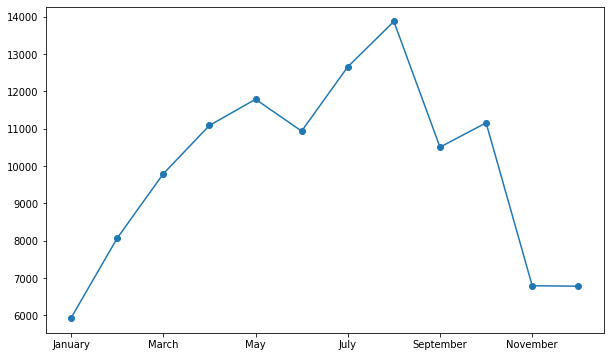

In [ ]:
# Which is the busiest month
plot_month = month['arrival_date_month'].plot(kind ='line',
                                       figsize = (10,6),
                                       marker = 'o')

In [ ]:
booking.groupby(['hotel', 'arrival_date_year'])['is_repeated_guest'].value_counts()

hotel         arrival_date_year  is_repeated_guest
City Hotel    2015               0                    13175
                                 1                      507
              2016               0                    37225
                                 1                      915
              2017               0                    26898
                                 1                      610
Resort Hotel  2015               0                     8180
                                 1                      134
              2016               0                    17704
                                 1                      863
              2017               0                    12398
                                 1                      781
Name: is_repeated_guest, dtype: int64

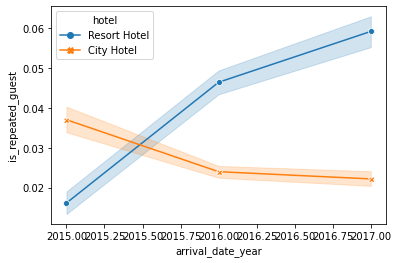

In [ ]:
sns.lineplot(data=booking, x=booking.arrival_date_year, y=booking.is_repeated_guest, hue=booking.hotel, style=booking.hotel, markers=True, dashes=False)

In [ ]:
booking.groupby(['hotel', 'arrival_date_year'])['is_canceled'].value_counts()

hotel         arrival_date_year  is_canceled
City Hotel    2015               0               7678
                                 1               6004
              2016               0              22733
                                 1              15407
              2017               0              15817
                                 1              11691
Resort Hotel  2015               0               6176
                                 1               2138
              2016               0              13637
                                 1               4930
              2017               0               9125
                                 1               4054
Name: is_canceled, dtype: int64

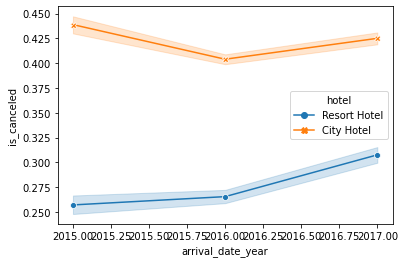

In [ ]:
sns.lineplot(data=booking, x=booking.arrival_date_year, y=booking.is_canceled, hue=booking.hotel, markers=True, dashes=False, style=booking.hotel)


In [ ]:
#now let's check how many days would people cancel the booking in advance
canceled = booking[(booking['is_canceled'] == 1) & (booking['reservation_status'] == 'Canceled')]

In [ ]:
month_mapping = {
           'January': 1,
           'February': 2,
           'March': 3,
           'April': 4,
           'May': 5,
           'June': 6,
           'July': 7,
           'August': 8,
           'September': 9,
           'October': 10,
           'November': 11,
           'December': 12}

In [ ]:
canceled['arrival_date_month'] = canceled['arrival_date_month'].map(month_mapping)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
canceled['arrival_date'] = pd.to_datetime(dict(year=canceled.arrival_date_year, month=canceled.arrival_date_month, day=canceled.arrival_date_day_of_month))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
canceled['reservation_status_date'] = pd.to_datetime(canceled['reservation_status_date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
canceled = canceled[['reservation_status_date', 'arrival_date']]

In [ ]:
canceled['days'] = canceled.arrival_date - canceled.reservation_status_date

In [ ]:
canceled.describe()

days
count                        43017
mean    83 days 17:56:49.693841969
std    122 days 12:44:46.604264818
min            -324 days +00:00:00
25%               13 days 00:00:00
50%               61 days 00:00:00
75%              152 days 00:00:00
max              597 days 00:00:00

In [ ]:
canceled['days'] = canceled['days'].dt.days

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'counts')

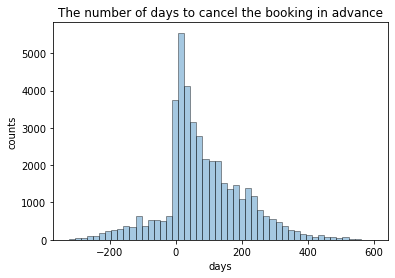

In [ ]:
sns.distplot(canceled.days, hist= True, kde= False,hist_kws={'edgecolor':'black'})
plt.title('The number of days to cancel the booking in advance')
plt.xlabel('days')
plt.ylabel('counts')

# Data Pre-processing

In [ ]:
#inspect booking with no person
booking.groupby(['adults','children','babies']).size()

adults  children  babies
0       1.0       0             4
        2.0       0           205
                  1             3
        3.0       0            11
1       0.0       0         22577
                  1             9
                  9             1
        1.0       0           277
                  1             2
        2.0       0           155
                  1             2
        3.0       0             4
2       0.0       0         81560
                  1           708
                  2            12
                  10            1
        1.0       0          3950
                  1           136
                  2             3
        2.0       0          3221
                  1            27
        3.0       0            61
        10.0      0             1
3       0.0       0          5666
                  1            10
        1.0       0           485
                  1             2
        2.0       0            39
4       0.0       0    

In [ ]:
#reindex those observations with no adults & children & babies and then drop those rows
indexNames = booking[(booking['adults'] == 0) & (booking['children'] == 0.0) & (booking['babies'] == 0)].index

In [ ]:
booking.drop(indexNames , inplace=True)

In [ ]:
# fill missing values in columns agent and company with 0 
booking[['agent','company']]= booking[['agent','company']].fillna(0.0)

In [ ]:
#get the country that most people come from
booking.country.value_counts()[:1]

PRT    48483
Name: country, dtype: int64

In [ ]:
#fill in the missing value in column country with the most one
booking[['country']] = booking[['country']].fillna('PRT')

In [ ]:
#fill in missing value with median
booking.children.fillna(booking.children.median(), inplace= True)

# Modelling

In [ ]:
# import libraries for neural network model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
#split the dataset into X and y, here the target is that the booking is canceled or not
X = booking.drop(['is_canceled','reservation_status', 'reservation_status_date'], axis=1)
y = booking['is_canceled']

In [ ]:
#check the data types of X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_year               119210 non-null  int64  
 3   arrival_date_month              119210 non-null  object 
 4   arrival_date_week_number        119210 non-null  int64  
 5   arrival_date_day_of_month       119210 non-null  int64  
 6   stays_in_weekend_nights         119210 non-null  int64  
 7   stays_in_week_nights            119210 non-null  int64  
 8   adults                          119210 non-null  int64  
 9   children                        119210 non-null  float64
 10  babies                          119210 non-null  int64  
 11  meal                            119210 non-null  object 
 12  country         

In [ ]:
# split the categorical data and numerical data for pre-processing
cat_var = X.columns[[2,3,11,12,13,14,18,19,21,22,23,25]]
num_var = X.columns[[1,4,5,6,7,8,9,10,15,16,17,20,24]]

In [ ]:
#format all categories as string
X[cat_var] = X[cat_var].astype(str)

In [ ]:
#get_dummies for categorical data
X = pd.get_dummies(X)

In [ ]:
# scale the normal numerical data
scaler = StandardScaler()
X[num_var] = scaler.fit_transform(X[num_var])

In [ ]:
#prepare the target
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

In [ ]:
#spilt train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.33, random_state=1)

# Supervised Machine Learning

In this section, Random Forest and XGboost classifiers are applied. And after a random model applying, both of the modes are optimized by hyperparameter tuning. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
#RandomForest Classifier
rf = RandomForestClassifier(n_estimators=150, random_state=10)
rf.fit(X_train,y_train)
print(accuracy_score((y_test), rf.predict(X_test)))

0.8947381799694967


In [ ]:
#hyperparameter tuning RandomForest
pipe = Pipeline([('classifier' , RandomForestClassifier())])

In [ ]:
param_grid = {'classifier' : [RandomForestClassifier()],
              'classifier__n_estimators' : list(range(90,300,20)),
              'classifier__max_features' : list(range(6,32,5))}


In [ ]:
clf = GridSearchCV(pipe, param_grid = param_grid, scoring= 'roc_auc',  cv = 5, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 163.3min


In [ ]:
print(accuracy_score((y_test), best_clf.predict(X_test)))

0.8956786985256736


In [ ]:
print(confusion_matrix(y_test, best_clf.predict(X_test)))
print(classification_report(y_test, best_clf.predict(X_test)))

[[23465  1314]
 [ 2790 11771]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     24779
           1       0.90      0.81      0.85     14561

    accuracy                           0.90     39340
   macro avg       0.90      0.88      0.89     39340
weighted avg       0.90      0.90      0.89     39340



Random Forest was optimized with 290 estimators, and 31 max_features. the payyerparemeter tuning improved little bit of the model. Then the classfication report indicates that the model can predict both class with a high level accuracy.

In [ ]:
#XGBoost Classifier
xgbc = XGBClassifier(n_estimators=100, random_state=10)
xgbc.fit(X_train,y_train)
print(accuracy_score((y_test), xgbc.predict(X_test)))

0.8536349771225216


In [ ]:
#hyperparameter tuning XGBoost
xgb_model = xgb.XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,150,200]}

In [ ]:
best_xgb = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='roc_auc', verbose=1)

In [ ]:
best_xgb.fit(X_train,y_train)

print(best_xgb.best_params_)
print(best_xgb.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 197.0min finished


{'max_depth': 6, 'n_estimators': 200}
0.9487326236152306


In [ ]:
print(accuracy_score((y_test), best_xgb.predict(X_test)))

0.8792323335027962


In [ ]:
print(confusion_matrix(y_test, best_xgb.predict(X_test)))
print(classification_report(y_test, best_xgb.predict(X_test)))

[[22935  1844]
 [ 2907 11654]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24779
           1       0.86      0.80      0.83     14561

    accuracy                           0.88     39340
   macro avg       0.88      0.86      0.87     39340
weighted avg       0.88      0.88      0.88     39340



XGBoost classifier was optimized with grid search, and the optimized estimator is 200, and the max_depth is 6. The model was optimized with 0.02 accuracy. the classification report of this model can also show that it can predict both classes well.

0.8589723264225079
0.8562134596389324


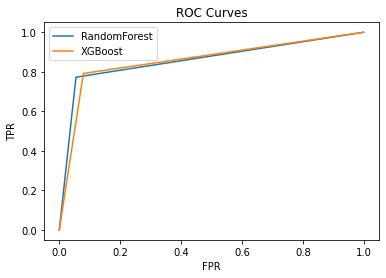

In [ ]:
rf_pred = cross_val_predict(best_clf, X_test, y_test, cv=5)
print(roc_auc_score(y_test, rf_pred))
fpr1, tpr1, _ = roc_curve(y_test, rf_pred)



xgb_pred = cross_val_predict(best_xgb, X_test, y_test, cv= 5)
print(roc_auc_score(y_test, xgb_pred))
fpr2, tpr2, _ = roc_curve(y_test, xgb_pred)

plt.plot(fpr1, tpr1, label= 'RandomForest')
plt.plot(fpr2, tpr2, label = 'XGBoost')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC Curves')
plt.show()

The roc curves of both models were created with 5-folder cross validations. And it is quite intuitive that RF performed a bit better than XGB.

In [ ]:
pprint(best_clf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 31,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 290,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}


In [ ]:
pprint(best_xgb.get_params())

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 10,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


# neural network

In [ ]:
# chek the input shape 
X_train.shape

(79870, 938)

In [ ]:
#build model
model = Sequential()
model.add(Dense(32, input_shape=(938,), activation='relu', kernel_initializer='uniform'))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.1)

Epoch 1/50
2247/2247 - 4s - loss: 0.3859 - accuracy: 0.8141 - val_loss: 0.3488 - val_accuracy: 0.8281
Epoch 2/50
2247/2247 - 3s - loss: 0.3314 - accuracy: 0.8379 - val_loss: 0.3310 - val_accuracy: 0.8392
Epoch 3/50
2247/2247 - 3s - loss: 0.3143 - accuracy: 0.8486 - val_loss: 0.3033 - val_accuracy: 0.8561
Epoch 4/50
2247/2247 - 3s - loss: 0.3060 - accuracy: 0.8518 - val_loss: 0.3004 - val_accuracy: 0.8608
Epoch 5/50
2247/2247 - 3s - loss: 0.3004 - accuracy: 0.8568 - val_loss: 0.2983 - val_accuracy: 0.8637
Epoch 6/50
2247/2247 - 3s - loss: 0.2944 - accuracy: 0.8594 - val_loss: 0.3133 - val_accuracy: 0.8515
Epoch 7/50
2247/2247 - 3s - loss: 0.2905 - accuracy: 0.8619 - val_loss: 0.3238 - val_accuracy: 0.8483
Epoch 8/50
2247/2247 - 3s - loss: 0.2911 - accuracy: 0.8618 - val_loss: 0.3069 - val_accuracy: 0.8508
Epoch 9/50
2247/2247 - 3s - loss: 0.2856 - accuracy: 0.8648 - val_loss: 0.2893 - val_accuracy: 0.8667
Epoch 10/50
2247/2247 - 3s - loss: 0.2829 - accuracy: 0.8654 - val_loss: 0.2907 - 

In [ ]:
#evaluate the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 87.20


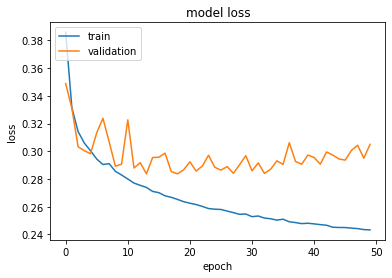

In [ ]:
#visualization of model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
rf_pred = best_clf.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, rf_pred)

xgb_pred = best_xgb.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, xgb_pred)

In [ ]:
y_pred_keras = model.predict(X_test).ravel()
fpr3, tpr3, thresholds_keras = roc_curve(y_test, y_pred_keras)

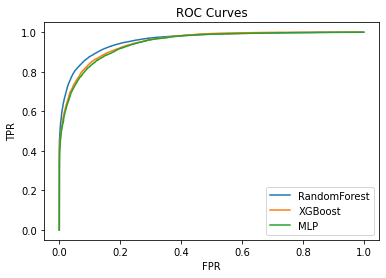

In [ ]:
plt.plot(fpr1, tpr1, label= 'RandomForest')
plt.plot(fpr2, tpr2, label = 'XGBoost')
plt.plot(fpr3, tpr3, label = 'MLP')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC Curves')
plt.show()

To get roc curve of all models presented, the roc curves without corss validation pf previous two models were created, and comapred with the neural network, Random forest outperformed, and the CGB and neural network are more or less overlapping, which is consistent with the accuracy score. 

# Natural Language Processing- Hotel Reviews

In [ ]:
# set column name of datasets
colnames=['date', 'rating','title', 'reviews']

In [ ]:
#load reviews of the resort hotel
review_resort = pd.read_csv('https://raw.githubusercontent.com/Youjingzhu/Portugal_hotel_reviews/main/reviewsalgarve.csv',names= colnames, header= None)

In [ ]:
#load reviews of the city hotel
review_city = pd.read_csv('https://raw.githubusercontent.com/Youjingzhu/Portugal_hotel_reviews/main/reviews_lisbon.csv', names= colnames, header= None)

In [ ]:
#check the columns and observations
review_resort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     3810 non-null   object
 1   rating   3810 non-null   int64 
 2   title    3810 non-null   object
 3   reviews  3810 non-null   object
dtypes: int64(1), object(3)
memory usage: 119.2+ KB


In [ ]:
review_resort.head()

date  ...                                            reviews
0  Oct 2020  ...  I was moved to this hotel as the one I had boo...
1  Oct 2020  ...  Stunning hotel in an amazing location. All the...
2  Sep 2020  ...  This was our first holiday during the pandemic...
3  Sep 2020  ...  A great hotel right by the beach. The outdoor ...
4  Sep 2020  ...  We stayed at Grande Real Santa Eulalia Resort ...

[5 rows x 4 columns]

In [ ]:
review_city.head()

date  ...                                            reviews
0  Sep 2017  ...  A good comfortable hotel outside of the city c...
1  Sep 2017  ...  PROS:beds very softtaxi stand right outsidegot...
2  Sep 2017  ...  The customer service was excellent, the sleep ...
3  Sep 2017  ...  Great hotel with all a warm and welcoming staf...
4  Sep 2017  ...  Our family of three stayed on our last leg of ...

[5 rows x 4 columns]

In [ ]:
# convert the date to datetime for filter
review_resort['date'] = pd.to_datetime(review_resort['date'])
review_city['date'] = pd.to_datetime(review_city['date'])

In [ ]:
#check the datatype again
review_resort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3810 non-null   datetime64[ns]
 1   rating   3810 non-null   int64         
 2   title    3810 non-null   object        
 3   reviews  3810 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 119.2+ KB


In [ ]:
#set the start date and end date for filter
start_date = '2015-07-01'
end_date = '2017-09-01'

In [ ]:
#filter the reviews from 2015-07-01 to 2017-09-01
after_start_date = review_resort['date'] >= start_date
before_end_date = review_resort['date'] <= end_date
between_two_dates = after_start_date & before_end_date
review_resort_filtered = review_resort.loc[between_two_dates]

In [ ]:
# same for another hotel reviews
after_start_date = review_city['date'] >= start_date
before_end_date = review_city['date'] <= end_date
between_two_dates = after_start_date & before_end_date
review_city_filtered = review_city.loc[between_two_dates]

In [ ]:
review_city_filtered.shape

(1523, 4)

In [ ]:
review_resort_filtered.shape

(1027, 4)

In [ ]:
# import packages for nlp
from wordcloud import WordCloud,STOPWORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy 
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#set stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
doclist = review_resort_filtered.reviews.values

In [ ]:
# tokenize the reviews and remove the stopwords
nlp = spacy.load("en")

tokens = []
for text in nlp.pipe(doclist):
  text_tok = [token.lemma_.lower() for token in text if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(text_tok)

In [ ]:
#add a new column
review_resort_filtered['tokenized'] = tokens

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
review_resort_filtered.head()

date  ...                                          tokenized
2427 2017-09-01  ...  [wonderful, landscape, fantastic, location, go...
2428 2017-09-01  ...  [week, family, lovely, excellent, food, evenin...
2429 2017-09-01  ...  [husband, hotel, nice, hotel, treat, ground, h...
2430 2017-09-01  ...  [fantastic, beach, stay, lovely, studio, apart...
2431 2017-09-01  ...  [lovely, place, quiet, easy, beach, access, sh...

[5 rows x 5 columns]

In [ ]:
#split the reviews to good(1) and bad(0) based on the rating, 1,2,3 as bad reviews, 4,5 as good reviews
def reviewsrating_sentiment(rating):
    # Replace reviewsrating of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(rating == 10 or rating == 20 or rating == 30):
        return 0
    else:
        return 1
review_resort_filtered.rating = review_resort_filtered.rating.apply(reviewsrating_sentiment)  

review_resort_filtered['tokens_string']=[' '.join(map(str,elem))for elem in review_resort_filtered['tokenized']]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#check the rating disribution
review_resort_filtered.rating.value_counts()

1    876
0    151
Name: rating, dtype: int64

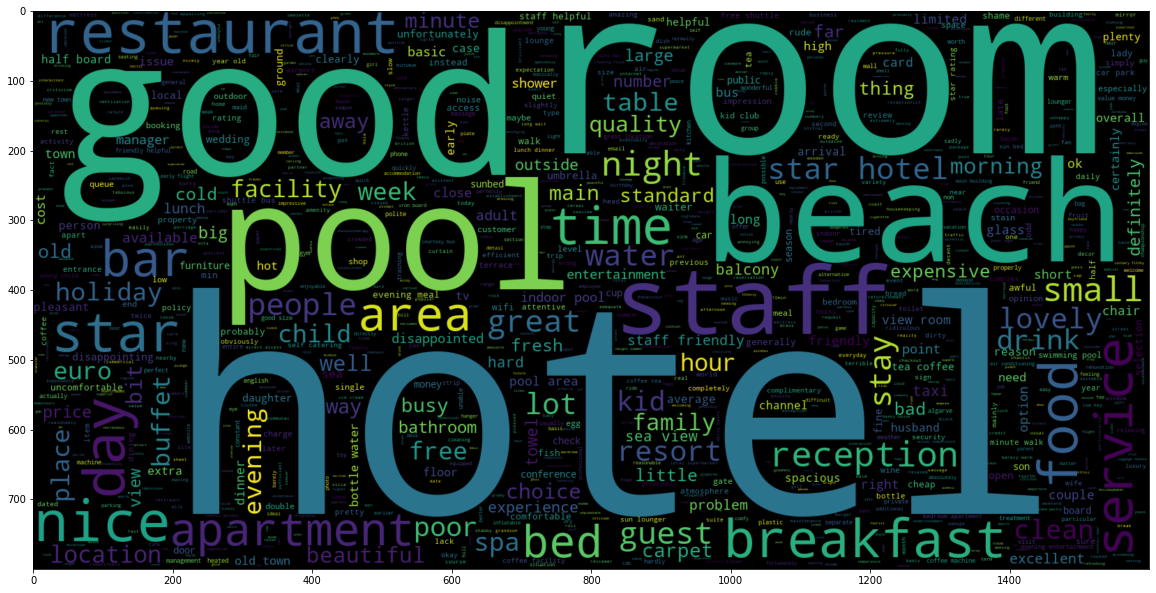

In [ ]:
#wordcloud for bad reviews of resort hotel
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(review_resort_filtered[review_resort_filtered.rating == 0].tokens_string))
plt.imshow(wc , interpolation = 'bilinear')

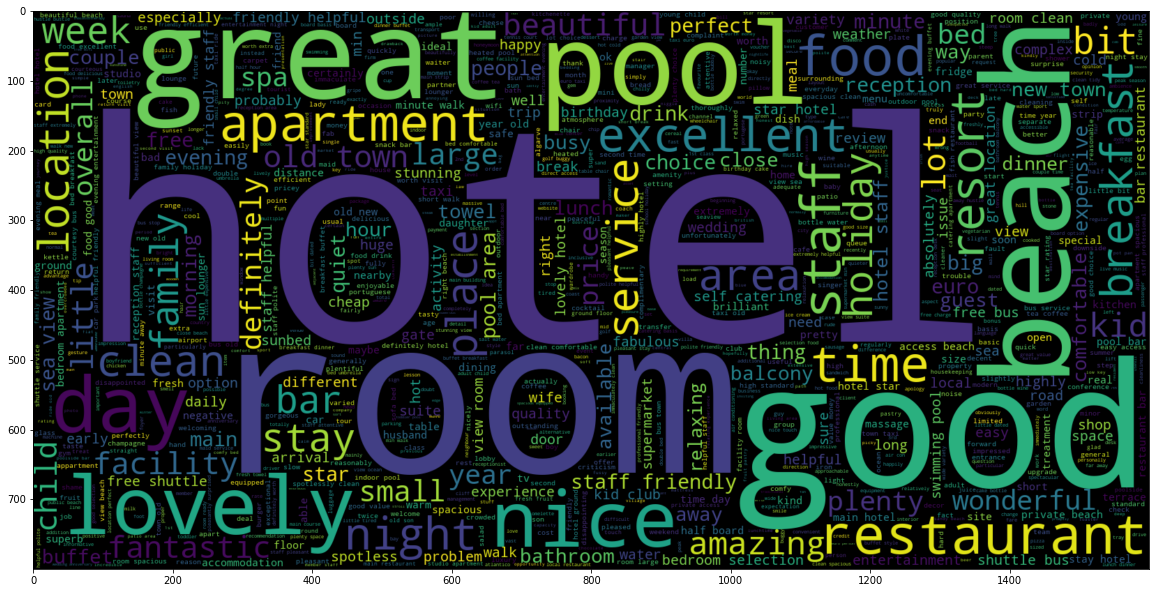

In [ ]:
#wordcloud for good reviews of resort hotel
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(review_resort_filtered[review_resort_filtered.rating == 1].tokens_string))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
# process exactly same for city hotel reviews
doclist1 = review_city_filtered.reviews.values

In [ ]:
tokens1 = []
for text in nlp.pipe(doclist1):
  text_tok = [token.lemma_.lower() for token in text if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens1.append(text_tok)

In [ ]:
review_city_filtered['tokenized'] = tokens1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
review_city_filtered.rating = review_city_filtered.rating.apply(reviewsrating_sentiment)  

review_city_filtered['tokens_string']=[' '.join(map(str,elem))for elem in review_city_filtered['tokenized']]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
review_city_filtered.rating.value_counts()

1    1392
0     131
Name: rating, dtype: int64

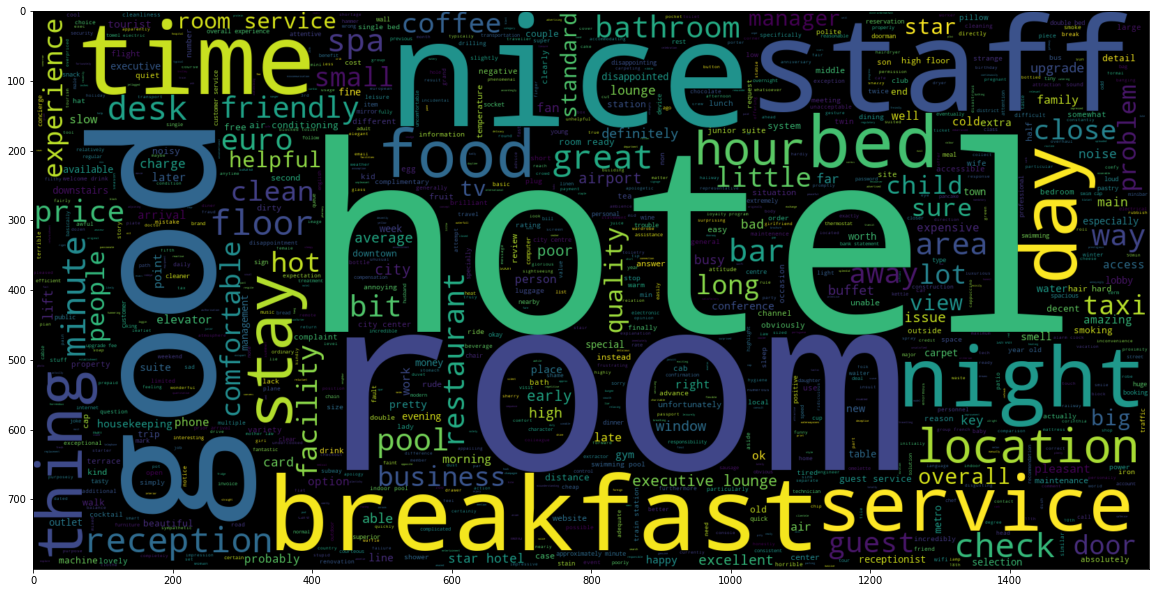

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(review_city_filtered[review_city_filtered.rating == 0].tokens_string))
plt.imshow(wc , interpolation = 'bilinear')

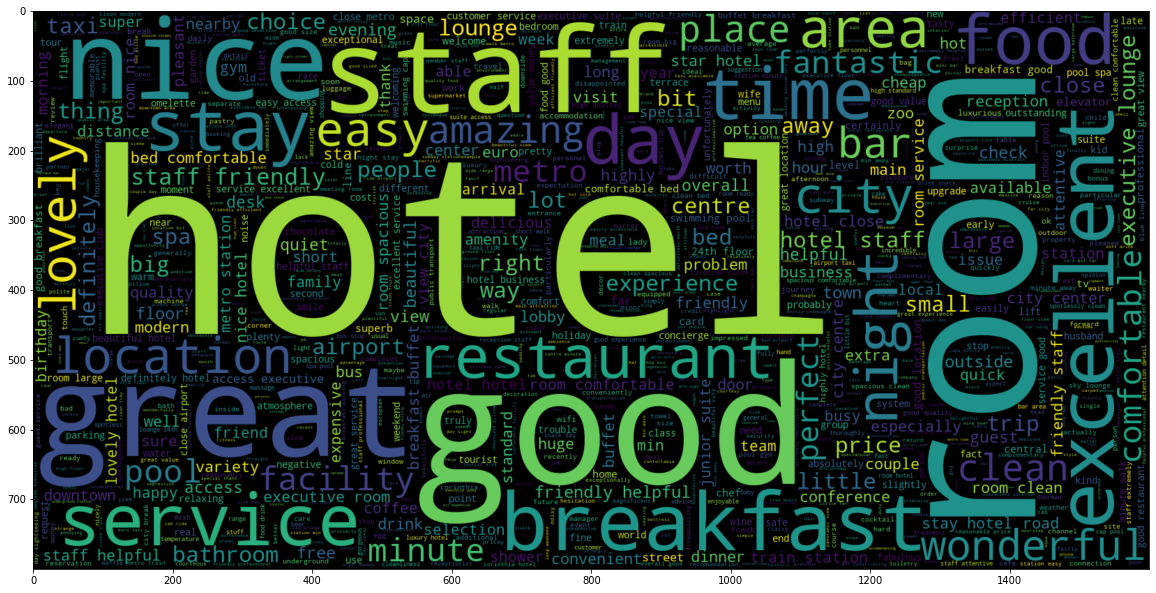

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(review_city_filtered[review_city_filtered.rating == 1].tokens_string))
plt.imshow(wc , interpolation = 'bilinear')

After we created the wordcloud for the reviews, we found that most of the keywords are positive, even though with bad reviews, the key words extracted are still positive. So we decided to create wordcloud with titles to see if there is any differences.

In [ ]:
#process the same with title as we did with reviews
titlist = review_resort_filtered.title.values
titlist1 = review_city_filtered.title.values

In [ ]:
toktitle = []
for text in nlp.pipe(titlist):
  text_tok = [token.lemma_.lower() for token in text if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop] 
  toktitle.append(text_tok)

In [ ]:
toktitle1 = []
for text in nlp.pipe(titlist1):
  text_tok = [token.lemma_.lower() for token in text if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop] 
  toktitle1.append(text_tok)

In [ ]:
review_resort_filtered['toktitle'] = toktitle
review_city_filtered['toktitle'] = toktitle1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
review_resort_filtered['title_string']=[' '.join(map(str,elem))for elem in review_resort_filtered['toktitle']]
review_city_filtered['title_string']=[' '.join(map(str,elem))for elem in review_city_filtered['toktitle']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


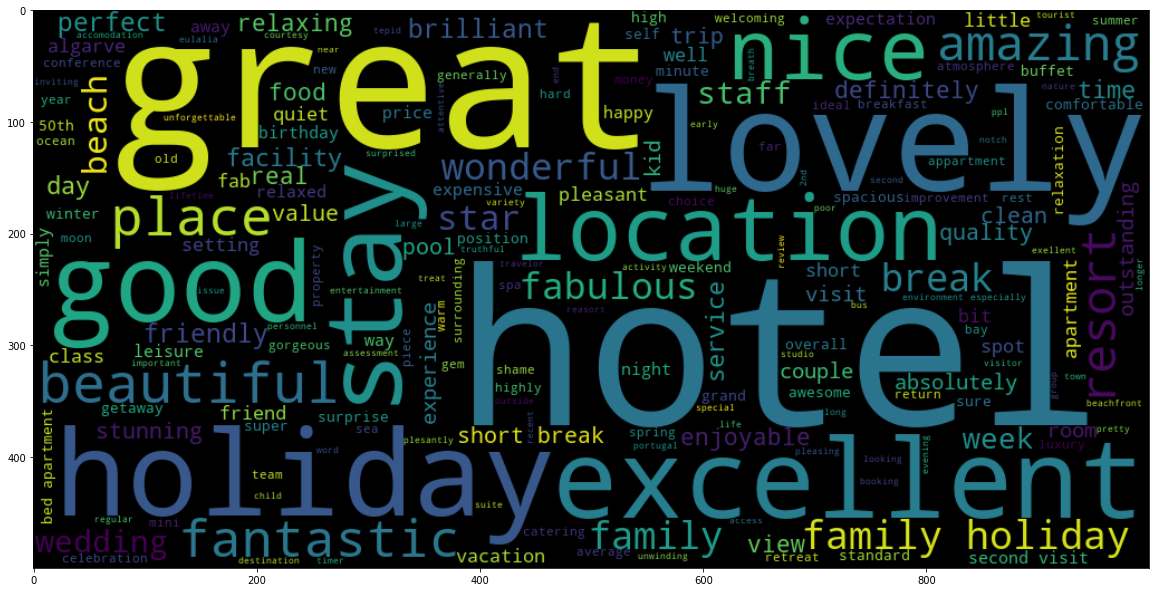

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 200 , width = 1000 , height = 500).generate(" ".join(review_resort_filtered[review_resort_filtered.rating == 1].title_string))
plt.imshow(wc , interpolation = 'bilinear')

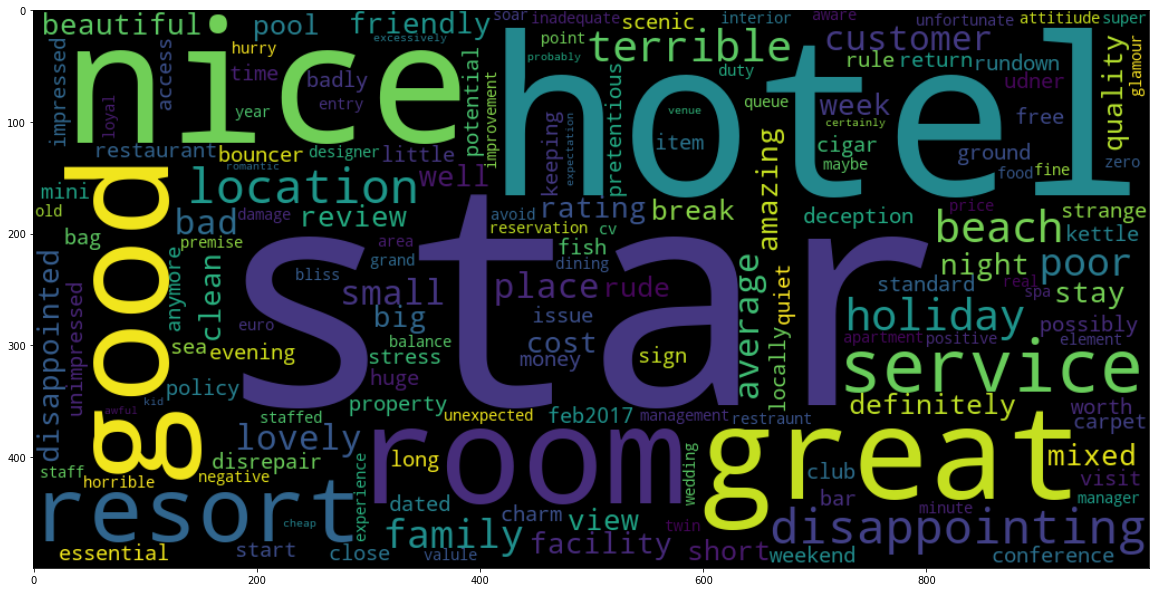

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1000 , height = 500).generate(" ".join(review_resort_filtered[review_resort_filtered.rating == 0].title_string))
plt.imshow(wc , interpolation = 'bilinear')

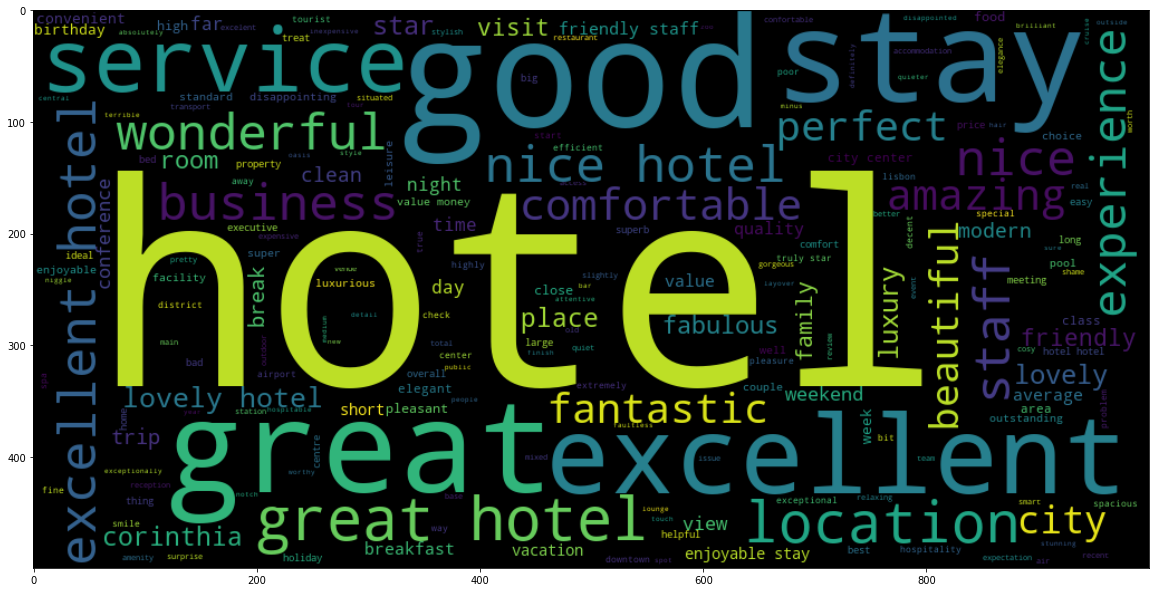

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 200 , width = 1000 , height = 500).generate(" ".join(review_city_filtered[review_city_filtered.rating == 1].title_string))
plt.imshow(wc , interpolation = 'bilinear')

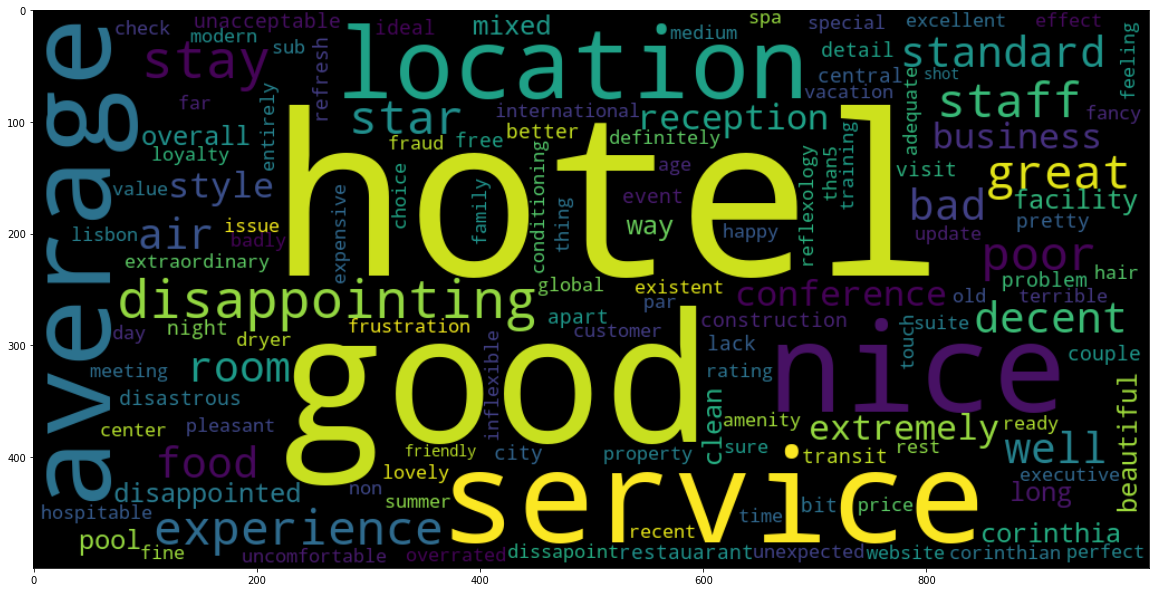

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 200 , width = 1000 , height = 500).generate(" ".join(review_city_filtered[review_city_filtered.rating == 0].title_string))
plt.imshow(wc , interpolation = 'bilinear')

# Topic Modelling

In [ ]:
#install gensim
!pip install -qq -U gensim

In [ ]:
#import packages
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore

In [ ]:
# Install visualtization package
!pip install -qq pyLDAvis

In [ ]:
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

In [ ]:
# create dictionary and corpus
dictionary = Dictionary(review_resort_filtered['tokenized'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in review_resort_filtered['tokenized']]

In [ ]:
# set lda model
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)

In [ ]:
# check the topics
lda_model.print_topics(-1)

[(0,
  '0.026*"location" + 0.023*"apartment" + 0.022*"great" + 0.018*"clean" + 0.017*"beach" + 0.014*"helpful" + 0.014*"standard" + 0.013*"customer" + 0.012*"friendly" + 0.011*"fantastic"'),
 (1,
  '0.037*"apartment" + 0.019*"beach" + 0.017*"lovely" + 0.016*"restaurant" + 0.015*"pool" + 0.014*"resort" + 0.013*"day" + 0.013*"good" + 0.012*"child" + 0.012*"bed"'),
 (2,
  '0.026*"good" + 0.021*"bar" + 0.021*"pool" + 0.020*"day" + 0.016*"evening" + 0.014*"food" + 0.014*"service" + 0.014*"beach" + 0.013*"restaurant" + 0.013*"time"'),
 (3,
  '0.026*"beach" + 0.026*"star" + 0.025*"food" + 0.018*"great" + 0.018*"kid" + 0.016*"good" + 0.015*"service" + 0.015*"family" + 0.014*"restaurant" + 0.014*"excellent"'),
 (4,
  '0.045*"nice" + 0.030*"pool" + 0.020*"spa" + 0.019*"clean" + 0.017*"star" + 0.014*"euro" + 0.013*"bit" + 0.013*"treatment" + 0.012*"lovely" + 0.012*"money"'),
 (5,
  '0.026*"beach" + 0.017*"view" + 0.017*"large" + 0.017*"star" + 0.014*"restaurant" + 0.013*"buffet" + 0.013*"area" + 

In [ ]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [ ]:
#visualization of the topics
pyLDAvis.display(lda_display)

In [ ]:
# same for city hotel
dictionary1 = Dictionary(review_city_filtered['tokenized'])
dictionary1.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus1 = [dictionary1.doc2bow(doc) for doc in review_city_filtered['tokenized']]
lda_model = LdaMulticore(corpus1, id2word=dictionary1, num_topics=10, workers = 4, passes=10)

In [ ]:
lda_model.print_topics(-1)

[(0,
  '0.032*"star" + 0.028*"money" + 0.025*"value" + 0.015*"good" + 0.014*"time" + 0.013*"place" + 0.012*"great" + 0.012*"stay" + 0.012*"comfortable" + 0.012*"helpful"'),
 (1,
  '0.021*"great" + 0.021*"good" + 0.020*"breakfast" + 0.019*"stay" + 0.018*"friendly" + 0.017*"pool" + 0.016*"amazing" + 0.016*"bed" + 0.015*"helpful" + 0.013*"time"'),
 (2,
  '0.028*"good" + 0.024*"service" + 0.018*"excellent" + 0.015*"great" + 0.014*"stay" + 0.013*"day" + 0.011*"breakfast" + 0.010*"restaurant" + 0.010*"helpful" + 0.009*"city"'),
 (3,
  '0.030*"good" + 0.018*"breakfast" + 0.016*"night" + 0.016*"time" + 0.014*"day" + 0.011*"floor" + 0.011*"restaurant" + 0.010*"bed" + 0.010*"comfortable" + 0.009*"nice"'),
 (4,
  '0.031*"executive" + 0.031*"lounge" + 0.024*"great" + 0.021*"view" + 0.018*"breakfast" + 0.018*"food" + 0.017*"city" + 0.016*"good" + 0.016*"access" + 0.016*"amazing"'),
 (5,
  '0.020*"comfortable" + 0.017*"good" + 0.017*"city" + 0.017*"bed" + 0.016*"clean" + 0.016*"breakfast" + 0.016*"l

In [ ]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus1, dictionary1)

In [ ]:
pyLDAvis.display(lda_display)

# TOPIC MODELLING - TUNED

In [ ]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
import numpy as np
import tqdm
from gensim.utils import ClippedCorpus

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/Users/zhuyoujing/Desktop/reviews.csv', index=False)
    pbar.close()

100%|██████████| 540/540 [1:24:40<00:00, 10.48s/it]

FileNotFoundError: ignored

In [ ]:
result =pd.DataFrame(model_results)

In [ ]:
result.head()

Validation_Set  Topics Alpha       Beta  Coherence
0     75% Corpus       2  0.01       0.01   0.379677
1     75% Corpus       2  0.01       0.31   0.351284
2     75% Corpus       2  0.01       0.61   0.365098
3     75% Corpus       2  0.01       0.91   0.356371
4     75% Corpus       2  0.01  symmetric   0.356452

In [ ]:
result.sort_values('Coherence', ascending= False)

Validation_Set  Topics       Alpha  Beta  Coherence
238     75% Corpus       9  asymmetric  0.91   0.465986
213     75% Corpus       9        0.01  0.91   0.453893
263     75% Corpus      10   symmetric  0.91   0.441130
266     75% Corpus      10  asymmetric  0.31   0.440844
237     75% Corpus       9  asymmetric  0.61   0.435852
..             ...     ...         ...   ...        ...
193     75% Corpus       8        0.61  0.91   0.303168
228     75% Corpus       9        0.91  0.91   0.302311
300    100% Corpus       3        0.01  0.01   0.297755
163     75% Corpus       7        0.61  0.91   0.297409
258     75% Corpus      10        0.91  0.91   0.279805

[540 rows x 5 columns]

In [ ]:
num_topics = 9

lda_model = LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta=0.91)

In [ ]:
lda_model.print_topics(-1)

[(0,
  '0.024*"great" + 0.024*"good" + 0.023*"beach" + 0.020*"pool" + 0.018*"lovely" + 0.016*"restaurant" + 0.015*"food" + 0.014*"town" + 0.014*"clean" + 0.013*"time"'),
 (1,
  '0.016*"manager" + 0.011*"member" + 0.011*"lady" + 0.011*"phone" + 0.008*"son" + 0.006*"world" + 0.005*"today" + 0.005*"internet" + 0.005*"simply" + 0.004*"duty"'),
 (2,
  '0.018*"later" + 0.016*"reception" + 0.014*"time" + 0.012*"minute" + 0.011*"reason" + 0.011*"away" + 0.011*"rude" + 0.011*"door" + 0.010*"guest" + 0.009*"half"'),
 (3,
  '0.033*"star" + 0.014*"coffee" + 0.014*"carpet" + 0.011*"bathroom" + 0.011*"area" + 0.011*"tea" + 0.010*"breakfast" + 0.009*"view" + 0.008*"guest" + 0.007*"floor"'),
 (4,
  '0.022*"chair" + 0.009*"reservation" + 0.008*"card" + 0.007*"appartment" + 0.006*"key" + 0.005*"luggage" + 0.005*"security" + 0.004*"gate" + 0.004*"complaint" + 0.004*"access"'),
 (5,
  '0.008*"run" + 0.007*"comfort" + 0.007*"treatment" + 0.006*"weather" + 0.006*"disappointing" + 0.006*"spa" + 0.005*"steam"

In [ ]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [ ]:
pyLDAvis.display(lda_display)

In [ ]:
def compute_coherence_values(corpus1, dictionary1, k, a, b):
    
    lda_model1 = LdaMulticore(corpus=corpus1,
                                           id2word=dictionary1,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model1, texts=tokens1, dictionary=dictionary1, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
import numpy as np
import tqdm
from gensim.utils import ClippedCorpus

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus1)
corpus_sets1 = [ClippedCorpus(corpus1, int(num_of_docs*0.75)), 
               corpus1]

corpus_title = ['75% Corpus1', '100% Corpus1']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus1=corpus_sets1[i], dictionary1=dictionary1, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/Users/zhuyoujing/Desktop/reviews.csv', index=False)
    pbar.close()


100%|██████████| 540/540 [1:45:18<00:00, 13.55s/it]

FileNotFoundError: ignored

In [ ]:
result1 =pd.DataFrame(model_results)

In [ ]:
result1.head()

Validation_Set  Topics Alpha       Beta  Coherence
0    75% Corpus1       2  0.01       0.01   0.410635
1    75% Corpus1       2  0.01       0.31   0.427119
2    75% Corpus1       2  0.01       0.61   0.430304
3    75% Corpus1       2  0.01       0.91   0.420981
4    75% Corpus1       2  0.01  symmetric   0.430304

In [ ]:
result1.sort_values('Coherence', ascending= False)

Validation_Set  Topics       Alpha       Beta  Coherence
143    75% Corpus1       6   symmetric       0.91   0.480348
443   100% Corpus1       7   symmetric       0.91   0.471637
58     75% Corpus1       3  asymmetric       0.91   0.469699
57     75% Corpus1       3  asymmetric       0.61   0.469623
285   100% Corpus1       2        0.91       0.01   0.469576
..             ...     ...         ...        ...        ...
240    75% Corpus1      10        0.01       0.01   0.355484
264    75% Corpus1      10   symmetric  symmetric   0.355246
244    75% Corpus1      10        0.01  symmetric   0.354321
239    75% Corpus1       9  asymmetric  symmetric   0.353474
301   100% Corpus1       3        0.01       0.31   0.345799

[540 rows x 5 columns]

In [ ]:
num_topics = 6

lda_model = LdaMulticore(corpus=corpus1,
                                           id2word=dictionary1,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           eta=0.9)

In [ ]:
lda_model.print_topics(-1)

[(0,
  '0.022*"far" + 0.021*"downtown" + 0.019*"birthday" + 0.017*"metro" + 0.016*"location" + 0.014*"right" + 0.014*"cake" + 0.013*"little" + 0.012*"great" + 0.012*"beautiful"'),
 (1,
  '0.038*"elevator" + 0.016*"high" + 0.009*"property" + 0.009*"delay" + 0.009*"number" + 0.008*"moment" + 0.008*"quality" + 0.007*"willing" + 0.007*"professional" + 0.007*"pleasant"'),
 (2,
  '0.027*"service" + 0.025*"executive" + 0.024*"great" + 0.023*"breakfast" + 0.020*"lounge" + 0.017*"day" + 0.015*"floor" + 0.014*"access" + 0.014*"stay" + 0.014*"good"'),
 (3,
  '0.015*"time" + 0.013*"desk" + 0.013*"bed" + 0.012*"night" + 0.012*"floor" + 0.012*"check" + 0.011*"bathroom" + 0.011*"service" + 0.010*"guest" + 0.009*"day"'),
 (4,
  '0.023*"city" + 0.020*"friendly" + 0.018*"minute" + 0.017*"lovely" + 0.016*"area" + 0.015*"metro" + 0.014*"taxi" + 0.014*"clean" + 0.013*"great" + 0.012*"bus"'),
 (5,
  '0.057*"good" + 0.035*"nice" + 0.024*"breakfast" + 0.022*"great" + 0.019*"service" + 0.018*"restaurant" + 0.0

In [ ]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus1, dictionary1)

In [ ]:
pyLDAvis.display(lda_display)